In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/image_dataset_anomaly_detection/train"
valid_path = "/content/drive/MyDrive/image_dataset_anomaly_detection/test"

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/image_dataset_anomaly_detection/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6633 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/image_dataset_anomaly_detection/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [ ]:
len(test_set)

23

In [38]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
208/208 [==============================] - 120s 567ms/step - loss: 0.3208 - accuracy: 0.8598 - val_loss: 0.3889 - val_accuracy: 0.8000
Epoch 2/50
208/208 [==============================] - 117s 562ms/step - loss: 0.3366 - accuracy: 0.8646 - val_loss: 0.2510 - val_accuracy: 0.8853
Epoch 3/50
208/208 [==============================] - 118s 565ms/step - loss: 0.2868 - accuracy: 0.8761 - val_loss: 0.6646 - val_accuracy: 0.7343
Epoch 4/50
208/208 [==============================] - 117s 562ms/step - loss: 0.3437 - accuracy: 0.8471 - val_loss: 0.2831 - val_accuracy: 0.8937
Epoch 5/50
208/208 [==============================] - 116s 555ms/step - loss: 0.3113 - accuracy: 0.8758 - val_loss: 1.0928 - val_accuracy: 0.6517
Epoch 6/50
208/208 [==============================] - 118s 568ms/step - loss: 0.2827 - accuracy: 0.8795 - val_loss: 0.2038 - val_accuracy: 0.9049
Epoch 7/50
208/208 [==============================] - 116s 558ms/step - loss: 0.2822 - accuracy: 0.8801 - val_loss: 0.2305 -

In [39]:
import matplotlib.pyplot as plt

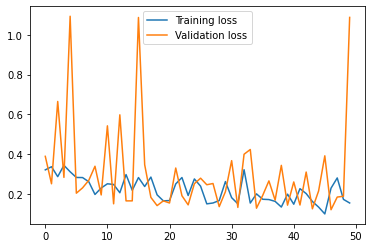

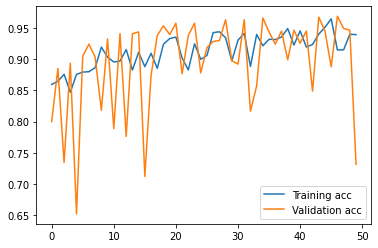

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='Training acc')
plt.plot(r.history['val_accuracy'], label='Validation acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

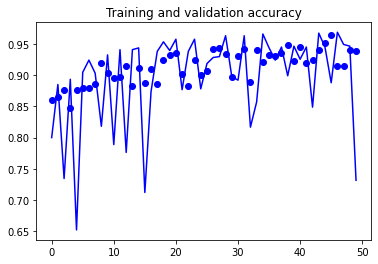

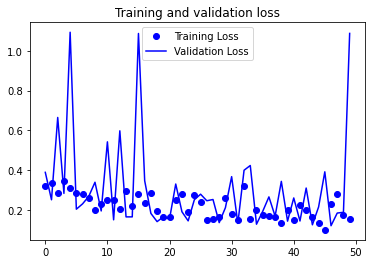

In [41]:
import matplotlib.pyplot as plt
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [43]:
normal_path = '/content/drive/MyDrive/image_dataset_anomaly_detection/test/normal/cast_ok_0_10.jpeg'
anomaly_path = '/content/drive/MyDrive/image_dataset_anomaly_detection/test/anomaly/cast_def_0_1059.jpeg'

In [42]:
model = load_model("model_resnet50.h5")

[4.23766e-12]


In [ ]:
y_pred = model.predict(test_set)


In [ ]:
from tensorflow.keras.preprocessing import image

img=image.load_img(normal_path,target_size=(224,224))
x=image.img_to_array(img)
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [ ]:
model.predict(img_data)

array([[1.0000000e+00, 1.1147262e-14]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)


array([0])

In [ ]:
a